# Challenge with ESS data

In [768]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import wilcoxon

In [769]:
data= pd.read_csv('ESSdata_Thinkful.csv')

In [770]:
data.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [771]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8594 entries, 0 to 8593
Data columns (total 13 columns):
cntry      8594 non-null object
idno       8594 non-null float64
year       8594 non-null int64
tvtot      8586 non-null float64
ppltrst    8580 non-null float64
pplfair    8555 non-null float64
pplhlp     8569 non-null float64
happy      8563 non-null float64
sclmeet    8579 non-null float64
sclact     8500 non-null float64
gndr       8584 non-null float64
agea       8355 non-null float64
partner    8577 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 873.0+ KB


In [772]:
data.isnull().sum()*100/len(data)

cntry      0.000000
idno       0.000000
year       0.000000
tvtot      0.093088
ppltrst    0.162904
pplfair    0.453805
pplhlp     0.290901
happy      0.360717
sclmeet    0.174540
sclact     1.093786
gndr       0.116360
agea       2.781010
partner    0.197812
dtype: float64

In [773]:
#dropping nan's since it is only little value
data.dropna(inplace=True)

## 1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

In [774]:
#changing values of 6 and 7 into 2012 and 2014
data['year'] = np.where(data['year'] == 6, 2012, 2014)

In [775]:
data.year.unique()

array([2012, 2014])

In [776]:
countries = data['cntry'].unique()
trust_2012 = data[['cntry', 'ppltrst']][data['year'] == 2012]
trust_2014= data[['cntry', 'ppltrst']][data['year'] ==2014]

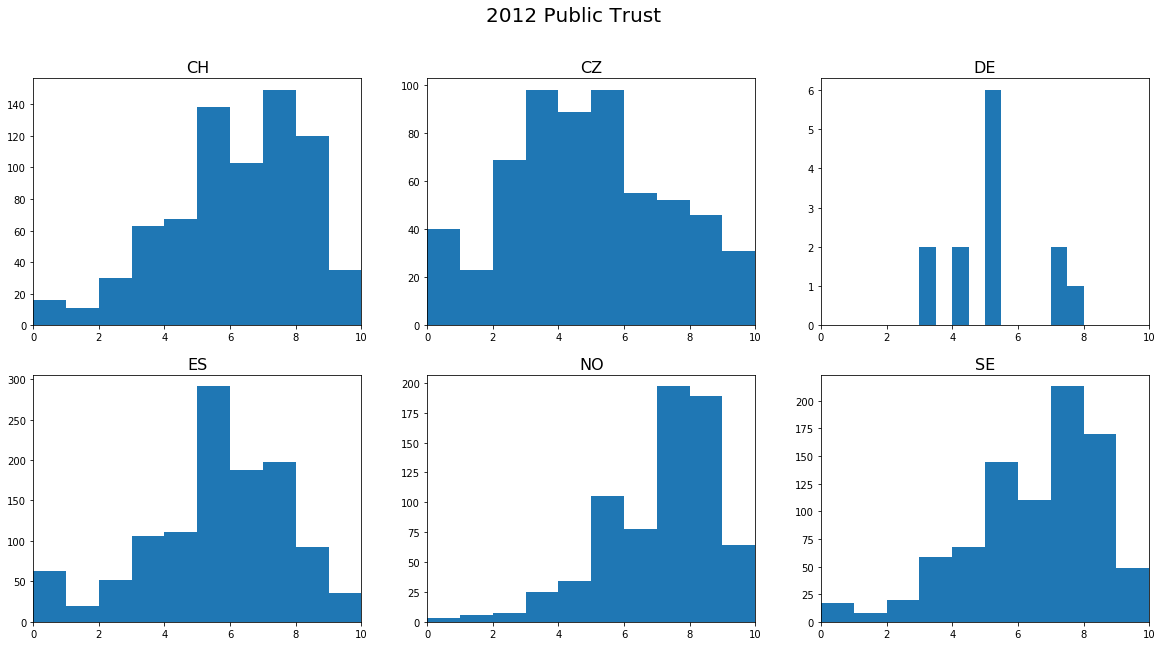

In [777]:
plt.figure(figsize=(20,10))
plt.suptitle('2012 Public Trust', size=20)
idx = 1
for cntry in countries:
    trst = trust_2012['ppltrst'][trust_2012['cntry'] == cntry]
    plt.subplot(2,3,idx)
    plt.hist(trst)
    plt.xlim(0,10)
    plt.title(cntry, size=16)
    idx += 1

plt.show()

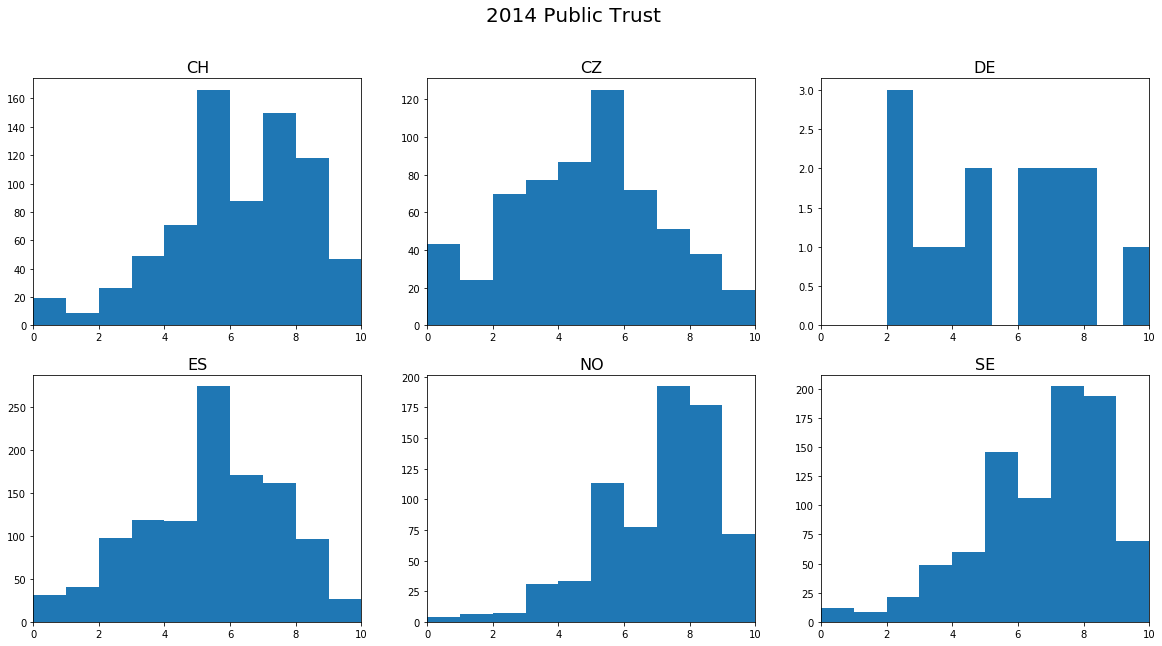

In [778]:
plt.figure(figsize=(20,10))
plt.suptitle('2014 Public Trust', size=20)
idx = 1
for cntry in countries:
    trst = trust_2014['ppltrst'][trust_2014['cntry'] == cntry]
    plt.subplot(2,3,idx)
    plt.hist(trst)
    plt.xlim(0,10)
    plt.title(cntry, size=16)
    idx += 1

plt.show()

In [779]:
change_overtime= data.groupby(['year', 'cntry'])['ppltrst'].mean()
change_overtime=pd.DataFrame(change_overtime)

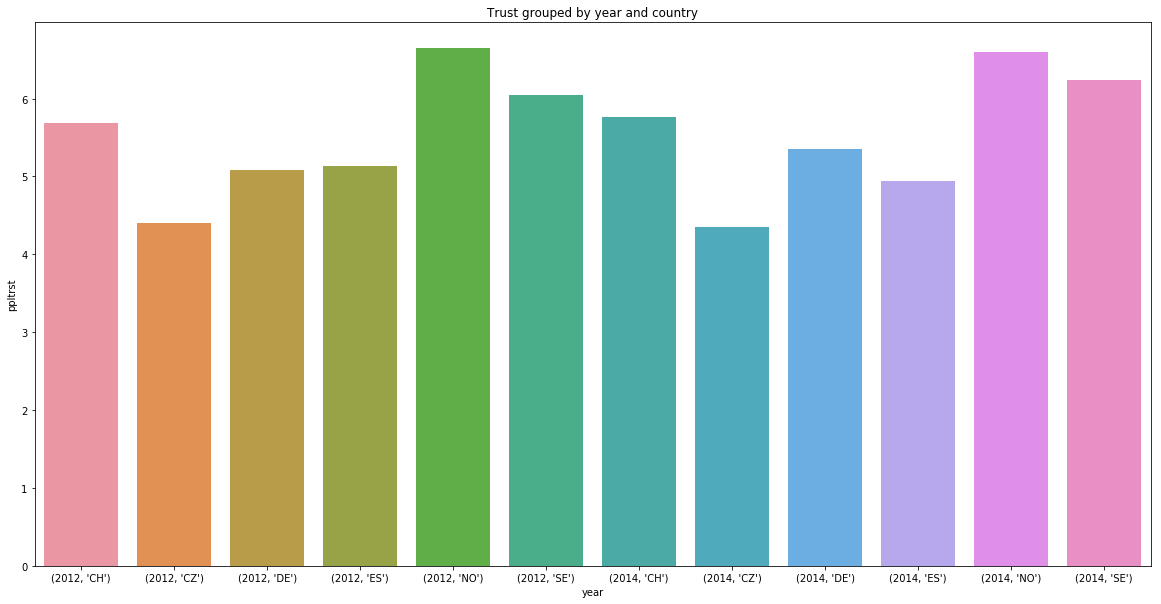

In [780]:
change_overtime['year']=change_overtime.index
plt.figure(figsize=(20,10))
sns.barplot(x='year', y='ppltrst', data=change_overtime)
plt.title('Trust grouped by year and country')
plt.show()


In [781]:
trust_2012.mean()

ppltrst    5.578482
dtype: float64

In [782]:
trust_2014.mean()

ppltrst    5.571394
dtype: float64

In [783]:
print('Country\t\t2012\t\t2014')
for cntry in countries:
    cntry_2012 = trust_2012['ppltrst'][trust_2012['cntry'] == cntry].mean()
    cntry_2014 = trust_2014['ppltrst'][trust_2014['cntry'] == cntry].mean()
    
    print(cntry, ': ', cntry_2012, cntry_2014)

Country		2012		2014
CH :  5.685792349726776 5.764468371467026
CZ :  4.402662229617304 4.356435643564357
DE :  5.076923076923077 5.357142857142857
ES :  5.127806563039724 4.940035273368607
NO :  6.648305084745763 6.599719101123595
SE :  6.043073341094296 6.239907727797001


It looks like Spain, Czech Republic and Norway had less public trust from 2012 to 2014. Overall, the EU countries had less trust from 2012 to 2014, but it's only a tiny drop. 

## 2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.

In [784]:
happy_2012 = data[['cntry', 'happy']][data['year'] == 2012]
happy_2014= data[['cntry', 'happy']][data['year'] ==2014]

In [785]:
print('Country\t\t2012\t\t2014')
for cntry in countries:
    cntry_2012 = happy_2012['happy'][happy_2012['cntry'] == cntry].mean()
    cntry_2014 = happy_2014['happy'][happy_2014['cntry'] == cntry].mean()
    
    print(cntry, ': ', cntry_2012, cntry_2014)

Country		2012		2014
CH :  8.083333333333334 8.142664872139973
CZ :  6.790349417637271 6.922442244224422
DE :  7.3076923076923075 7.857142857142857
ES :  7.557858376511226 7.450617283950617
NO :  8.252824858757062 7.919943820224719
SE :  7.90104772991851 7.9388696655132645


In [786]:
print('2012', happy_2012.mean())
print('2014', happy_2014.mean())

2012 happy    7.731516
dtype: float64
2014 happy    7.685476
dtype: float64


Not much difference for happiness from 2012 to 2014. There is a slight decrease in Norway's and Spain's happiness. Let's test it and see the significance of this difference. First let's look at the distribution. 

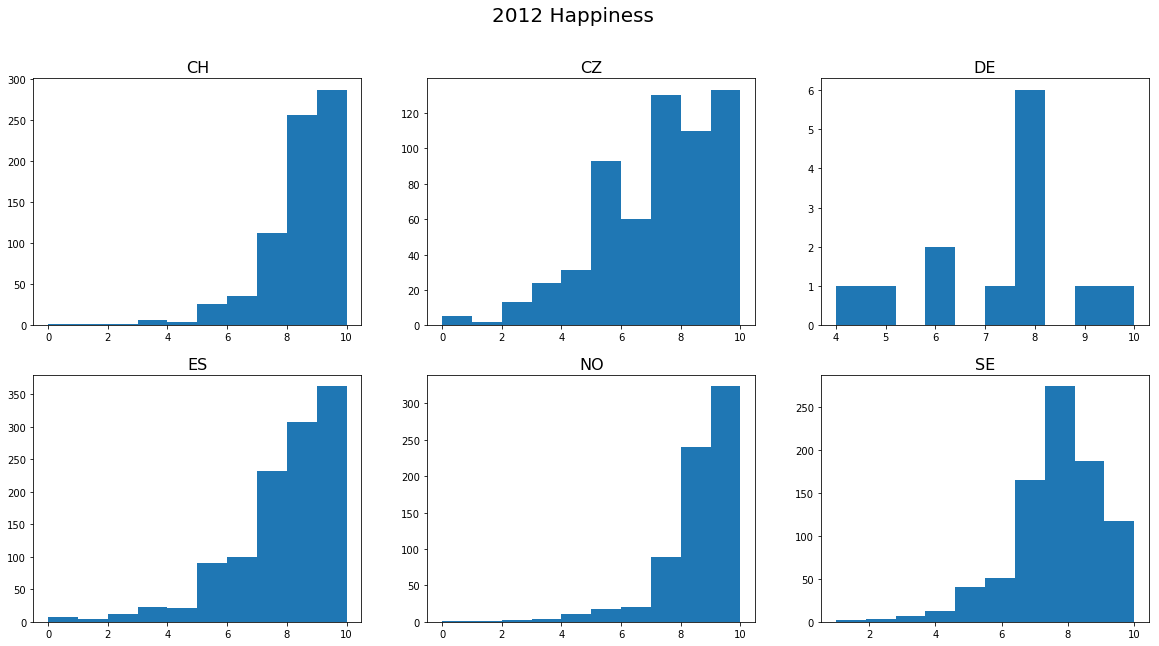

In [787]:
plt.figure(figsize=(20,10))
plt.suptitle('2012 Happiness', size=20)
idx = 1
for cntry in countries:
    happy = happy_2012['happy'][happy_2012['cntry'] == cntry]
    plt.subplot(2,3,idx)
    plt.hist(happy)
    #plt.xlim(0,10)
    plt.title(cntry, size=16)
    idx += 1

plt.show()

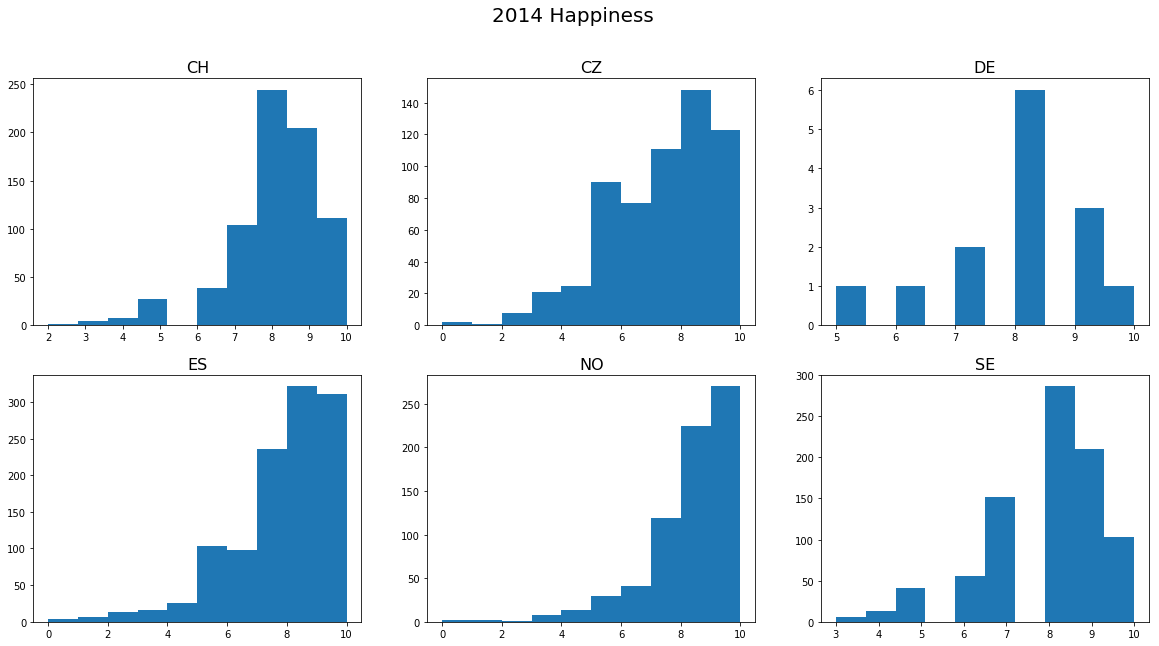

In [788]:
plt.figure(figsize=(20,10))
plt.suptitle('2014 Happiness', size=20)
idx = 1
for cntry in countries:
    happy = happy_2014['happy'][happy_2014['cntry'] == cntry]
    plt.subplot(2,3,idx)
    plt.hist(happy)
    #plt.xlim(0,10)
    plt.title(cntry, size=16)
    idx += 1

plt.show()

Their distributions are all skewed and non-normal. For this type of distribution, we can use Wilcoxon test. 

In [789]:
print('Country\tW\t\tp-value')
for cntry in countries:
    hppy_2012 = happy_2012['happy'][happy_2012['cntry'] == cntry]
    hppy_2014 = happy_2014['happy'][happy_2014['cntry'] == cntry]
    
    hppy_2012 = hppy_2012.tolist()
    hppy_2014 = hppy_2014.tolist()
    
    # Dealing with unequal list lengths
    maxid = len(hppy_2012)
    if len(hppy_2014) < maxid:
        maxid = len(hppy_2014)
    
    # Wilcoxon Test
    w, p = stats.wilcoxon(hppy_2012[:maxid], hppy_2014[:maxid])
    
    print(cntry, ': ', w, '\t', p)

Country	W		p-value
CH :  72908.5 	 0.5767042949680168
CZ :  61773.5 	 0.38263492515573405
DE :  17.0 	 0.5071224553598253
ES :  212608.0 	 0.17284338638135865
NO :  64696.0 	 1.6078039491474595e-05
SE :  110648.0 	 0.72351428366515


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


Only Norway shows a statistical significance. There truly is a difference in happiness from 2012 to 2014. 

## 3. Who reported watching more TV in 2012, men or women?

In [791]:
data['gndr'] = ['Male' if v == 1.0 else 'Female' for v in data.gndr.values]

In [792]:
Male_tv_2012 = data['tvtot'][(data['year'] == 2012) & (data['gndr'] == 'Male')]
Female_tv_2012 = data['tvtot'][(data['year'] == 2012) & (data['gndr'] == 'Female')]


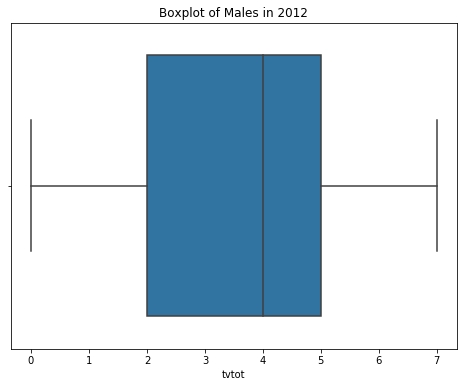

In [794]:
plt.figure(figsize=(8,6))
sns.boxplot(Male_tv_2012)
plt.title('Boxplot of Males and TV total in 2012')
plt.show()


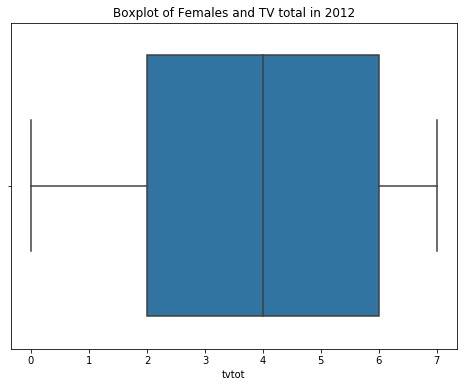

In [795]:
plt.figure(figsize=(8,6))
sns.boxplot(Female_tv_2012)
plt.title('Boxplot of Females and TV total in 2012')
plt.show()


In [796]:
print('Men: ', stats.shapiro(Male_tv_2012))
print('Women: ', stats.shapiro(Female_tv_2012))

Men:  (0.9443334937095642, 3.718612884828085e-27)
Women:  (0.9407297372817993, 1.0867231118970029e-27)


shapiro confirms data is normal. Because distribution is normal, we can do a t-test.

In [797]:
stats.ttest_ind(Male_tv_2012, Female_tv_2012)

Ttest_indResult(statistic=-0.7323552192640558, pvalue=0.4639939646110154)

The results are not statistically significant. Not much difference between male and female. 

## 4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

In [798]:
data['partner'] = ['Yes' if v == 1.0 else 'No' for v in data.partner.values]

In [799]:
Yes_partner_2012 = data['pplfair'][(data['year'] == 2012) & (data['partner'] == 'Yes')]
No_partner_2012 = data['pplfair'][(data['year'] == 2012) & (data['partner'] == 'No')]

In [800]:
print(Yes_partner_2012.mean())
print(No_partner_2012.mean())
print('People with partners believe people were fair than those that did not have partners')

6.0743509047993705
5.86592544146501
People with partners believe people were fair than those that did not have partners


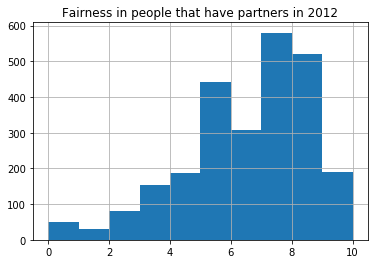

In [801]:
Yes_partner_2012.hist()
plt.title('Fairness in people that have partners in 2012')
plt.show()

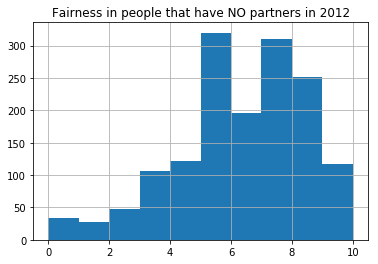

In [802]:
No_partner_2012.hist()
plt.title('Fairness in people that have NO partners in 2012')
plt.show()

Distribution appears to be skewed to the left, and is non-normal. We can confirm with boxplots and shapiro test if data is truly non-normal.

In [803]:
print('Alone: ', stats.shapiro(Yes_partner_2012))
print('Partner: ', stats.shapiro(No_partner_2012))

Alone:  (0.9396088123321533, 5.344745707680362e-31)
Partner:  (0.9547916650772095, 2.436869843664993e-21)


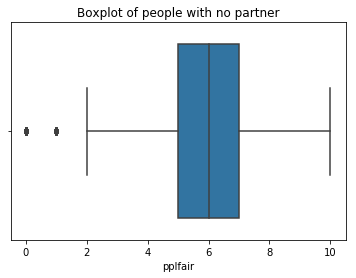

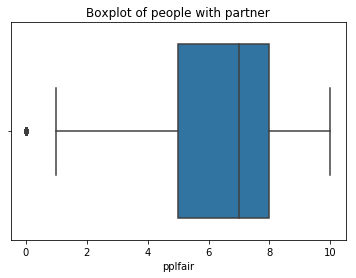

In [804]:
sns.boxplot(No_partner_2012)
plt.title('Boxplot of people with no partner')
plt.show()

sns.boxplot(Yes_partner_2012)
plt.title('Boxplot of people with partner')
plt.show()

In [805]:
#It seems like we can still do a t-test for this since our shapiro results show high values. 
stats.ttest_ind(No_partner_2012, Yes_partner_2012)

Ttest_indResult(statistic=-3.0430439318464235, pvalue=0.002356936676939248)

Results are significant. This means that people with partners believe people were fair than those without partners.

## 5. Pick three countries and compare how often people met socially in 2014. Are there differences, and if so which countries stand out?

In [806]:
data.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,2012,3.0,3.0,10.0,5.0,8.0,5.0,4.0,Female,60.0,Yes
1,CH,25.0,2012,6.0,5.0,7.0,5.0,9.0,3.0,2.0,Female,59.0,Yes
2,CH,26.0,2012,1.0,8.0,8.0,8.0,7.0,6.0,3.0,Male,24.0,No
3,CH,28.0,2012,4.0,6.0,6.0,7.0,10.0,6.0,2.0,Female,64.0,Yes
4,CH,29.0,2012,5.0,6.0,7.0,5.0,8.0,7.0,2.0,Female,55.0,Yes


In [807]:
data.cntry.unique()

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

In [808]:
#Yes_partner_2012 = data['pplfair'][(data['year'] == 2012) & (data['partner'] == 'Yes')]
Czech= data['sclmeet'][(data['year']==2014) &(data['cntry'] == 'CH')]
Spain= data['sclmeet'][(data['year']==2014) &(data['cntry'] == 'ES')]
Norway= data['sclmeet'][(data['year']==2014) &(data['cntry'] == 'NO')]

In [809]:
countries= ['CH', 'ES', 'NO']
cntry_data= (Czech, Spain, Norway)

for c, d in zip(countries, cntry_data):
    print(c, ': ', d.mean())

CH :  5.174966352624495
ES :  5.263668430335097
NO :  5.310393258426966


Looking at the means, there doesn't seem to be much difference. Let's look at distributions.

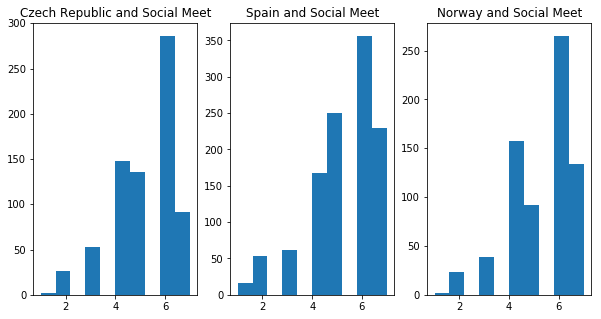

In [810]:
plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.hist(Czech)
plt.title('Czech Republic and Social Meet')
plt.xlabel('')

plt.subplot(1,3,2)
plt.hist(Spain)
plt.title('Spain and Social Meet')

plt.subplot(1,3,3)
plt.hist(Norway)
plt.title('Norway and Social Meet')
plt.show()

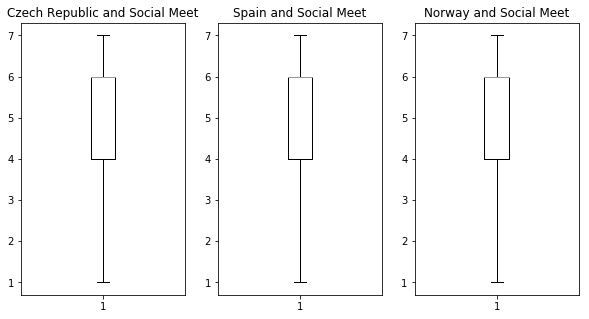

In [811]:
plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.boxplot(Czech)
plt.title('Czech Republic and Social Meet')
plt.xlabel('')

plt.subplot(1,3,2)
plt.boxplot(Spain)
plt.title('Spain and Social Meet')

plt.subplot(1,3,3)
plt.boxplot(Norway)
plt.title('Norway and Social Meet')
plt.show()

In [812]:
for c, d in zip(countries, cntry_data):
    print(c, ': ', stats.shapiro(d))

CH :  (0.8976361155509949, 7.658747353767709e-22)
ES :  (0.8927679657936096, 2.280180298346974e-27)
NO :  (0.887718915939331, 2.537563078833279e-22)


Distributions are somewhat normal. Let's do a t-test. 

In [813]:
CH_ES = stats.ttest_ind(Czech, Spain)
ES_NO = stats.ttest_ind(Spain, Norway)
NO_CH = stats.ttest_ind(Norway, Czech)

print('Country Tests\t\tT-Test Stat\t\tp-value')
print('Czech Republic and Spain:', CH_ES[0], CH_ES[1])
print('Spain and Norway : ', ES_NO[0], ES_NO[1])
print('Norway and Czech Republic: ', NO_CH[0], NO_CH[1])

Country Tests		T-Test Stat		p-value
Czech Republic and Spain: -1.3563979158247432 0.17513589623821907
Spain and Norway :  -0.6968046493592841 0.48601288469157433
Norway and Czech Republic:  1.9524600649137105 0.05107541004946689


There's only a significant difference between Norway and Czech Republic.

## 6.Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [853]:
#CH_age_year_scact= data[['sclact', 'agea']][(data['year']==2014) &(data['cntry'] == 'CH')]
#ES_age_year_scact= data[['sclact', 'agea']][(data['year']==2014) &(data['cntry'] == 'ES')]
#NO_age_year_scact= data[['sclact', 'agea']][(data['year']==2014) &(data['cntry'] == 'NO')]

In [847]:
CH_age_year_scact= data['sclact'][(data['year']==2014) &(data['cntry'] == 'CH')&(data['agea'])]
ES_age_year_scact= data['sclact'][(data['year']==2014) &(data['cntry'] == 'ES')&(data['agea'])]
NO_age_year_scact= data['sclact'][(data['year']==2014) &(data['cntry'] == 'NO')&(data['agea'])]

In [848]:
countries=['CH', 'ES', 'NO']
scact= [CH_age_year_scact, ES_age_year_scact, NO_age_year_scact]

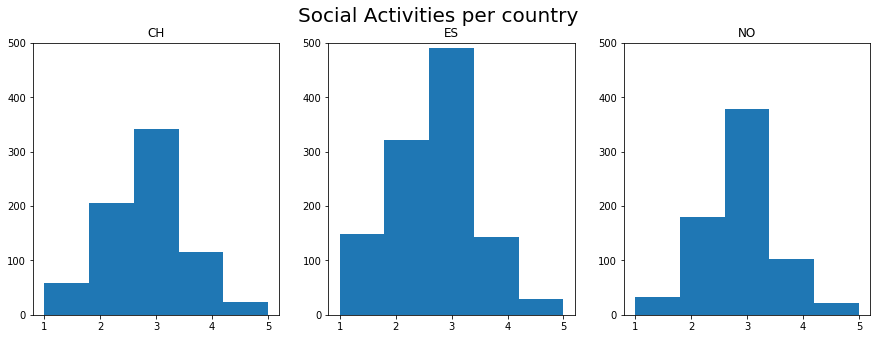

In [849]:
plt.figure(figsize=(15,5))
plt.suptitle('Social Activities per country', size=20)
idx = 1 
for c, d in zip(countries, scact):
    plt.subplot(1,3,idx)
    plt.hist(d, bins=5)
    plt.ylim(0,500)
    plt.title(c)
    idx += 1
plt.show()

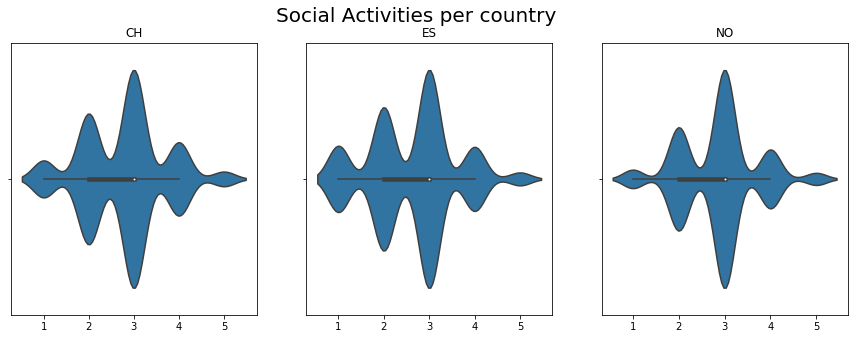

In [850]:
plt.figure(figsize=(15,5))
plt.suptitle('Social Activities per country', size=20)
idx = 1 
for c, d in zip(countries, scact):
    plt.subplot(1,3,idx)
    sns.violinplot(d, bins=5)
    #plt.ylim(0,500)
    plt.title(c)
    plt.xlabel('')
    idx += 1
plt.show()

In [851]:
CH_age_year_scact=pd.DataFrame(CH_age_year_scact)
ES_age_year_scact=pd.DataFrame(ES_age_year_scact)
NO_age_year_scact=pd.DataFrame(NO_age_year_scact)

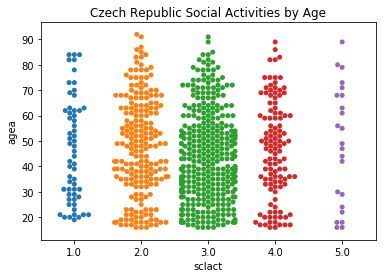

In [854]:
sns.swarmplot(x='sclact', y='agea', data= CH_age_year_scact)
plt.title('Czech Republic Social Activities by Age')
plt.show()

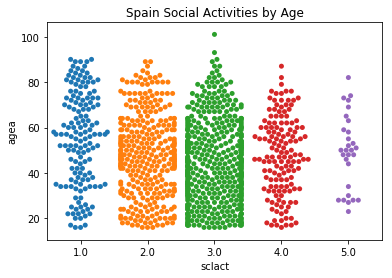

In [855]:
sns.swarmplot(x='sclact', y='agea', data= ES_age_year_scact)
plt.title('Spain Social Activities by Age')
plt.show()

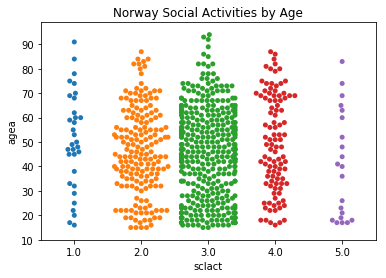

In [856]:
sns.swarmplot(x='sclact', y='agea', data= NO_age_year_scact)
plt.title('Norway Social Activities by Age')
plt.show()

The distributions look normal from histograms. Just by looking at swarmplots, we can tell that majority thinks in all countries that their social activities are about the same as other people their age. In Spain, we can see that there's also many people thinking they have less social activities than most people their age. Let's do a t-test to compare these countries since distribution is normal.

In [857]:
CH_ES = stats.ttest_ind(CH_age_year_scact, ES_age_year_scact)
ES_NO = stats.ttest_ind(ES_age_year_scact, NO_age_year_scact)
NO_CH = stats.ttest_ind(NO_age_year_scact, CH_age_year_scact)

print('Country Tests\t\tT-Test Stat\t\tp-value')
print('Czech Republic and Spain:', CH_ES[0], CH_ES[1])
print('Spain and Norway : ', ES_NO[0], ES_NO[1])
print('Norway and Czech Republic: ', NO_CH[0], NO_CH[1])

Country Tests		T-Test Stat		p-value
Czech Republic and Spain: [ 3.47898793 -1.76382902] [0.00051481 0.0779236 ]
Spain and Norway :  [-5.31751241  1.20738536] [1.17992913e-07 2.27438613e-01]
Norway and Czech Republic:  [1.68066188 0.49040324] [0.09304354 0.62392263]


Spain and Norway have a significant difference between the two. Others are not comparable. 